In [1]:
from numpy import linspace, int16, zeros, pi, asarray, sin, concatenate, where, array, ndarray, repeat, log10
from pylab import specgram, plot, subplot, title, xlabel, ylabel, grid, axis, xlim, ylim, pause
from matplotlib import pyplot as plt
from scipy.io import wavfile

In [2]:
def get_piano_notes():   
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    
    keys = array([x+str(y) for y in range(0,9) for x in octave])
    
    # Trim to standard 88 keys
    start = where(keys == 'A0')[0][0]
    end = where(keys == 'C8')[0][0]
    keys = keys[start:end+1]

    # use this formula to create the note frequency
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    
    return note_freqs

In [3]:
# Call the function to create all the frequencies for the notes
notes = get_piano_notes()

In [4]:
# get sine wave for the note

def get_sine_wave(freq, duration, sample_rate=44100, amplitude=4096):
    t = linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude * sin(2* pi * freq * t)
    return wave.astype(int16)

In [5]:
# Get middle C frequency
frequency = notes['C4']
frequency

261.6255653005986

In [6]:
#We can get the sine wave of any given note by calling the sine wave function
sine_wave = get_sine_wave(frequency, duration=2, amplitude=2048)
sine_wave

array([   0,   76,  152, ..., 2043, 2047, 2047], dtype=int16)

## Let's create music

### Music Piano Notes: Twinkle Twinkle Little Star

#### Let's review the notes for one of the favorite children song
I have included the piano note for each part of the song
We will convert this to frequency and create the wave file

> `Twin kle, twin kle, lit tle star.`\
> `C4#  C4#  G4#  G4#  A4# A4# G4#`
>
> `How   I   wond er   what you are.`\
> `F4#  F4#  F4#  F4#  D4#  D4# C4#`
>
> `Up   ab   ove  the  world so  high,`\
> `C4#  C4#  G4#  G4#   A4#  A4# G4#`
>
> `Like  a   dia  mond in    the sky.`\
> `F4#  F4#  F4#  F4#  D4#   D4# C4#`

In [7]:
# We have two options. We can convert this into a list of strings as C4 or just C

# Converting this into a list of strings, we get this:

#twinkle_piano_notes = [
#'C4 C4 G4 G4 A4 A4 G4',      # Twinkle, Twinkle Little Star
#'F4 F4 E4 E4 D4 D4 C4',      # How I Wonder What You Are
#'G4 G4 F4 F4 E4 E4 D4',      # Up Above The World So High
#'G4 G4 F4 F4 E4 E4 D4',      # Like A Diamond In The Sky
#'C4 C4 G4 G4 A4 A4 G4',      # Twinkle, Twinkle Little Star
#'F4 F4 E4 E4 D4 D4 C4'       # How I Wonder What You Are
#]

In [8]:
# Converting this into a list of strings:
# We can add 4# to each note when we convert it to a frequency

twinkle_piano_notes = [
'C C G G A A G',      # Twinkle, Twinkle Little Star
'F F E E D D C',      # How I Wonder What You Are
'G G F F E E D',      # Up Above The World So High
'G G F F E E D',      # Like A Diamond In The Sky
'C C G G A A G',      # Twinkle, Twinkle Little Star
'F F E E D D C'       # How I Wonder What You Are
]

In [9]:
# First convert the pinao notes into a list of notes
twinkle_piano = []
for x in twinkle_piano_notes: twinkle_piano.extend(x.split(' '))

In [10]:
#Then convert each note into a frequency by getting the frequency from note_freq table
#Adding #4 to each note so it converts to C4 for C
twinkle_notes = [notes[t + '4'] for t in twinkle_piano]

In [11]:
# Let's add a pause note at the end of each note
# We can first zip both notes and zero to create the pair, then use ravel to flatten it to a list
twinkle = array([[i, j] for i, j in zip(twinkle_notes, repeat(0.0,len(twinkle_notes)))]).ravel()

# Let's print the note frequency for each one. We get :
# C4 pause C4 pause C4 pause G4 pause G4 pause A4 pause A4 pause G4 to the original string noe = C4 C4 G4 G4 A4 A4 G4
twinkle

array([261.6255653 ,   0.        , 261.6255653 ,   0.        ,
       391.99543598,   0.        , 391.99543598,   0.        ,
       440.        ,   0.        , 440.        ,   0.        ,
       391.99543598,   0.        , 349.22823143,   0.        ,
       349.22823143,   0.        , 329.62755691,   0.        ,
       329.62755691,   0.        , 293.66476792,   0.        ,
       293.66476792,   0.        , 261.6255653 ,   0.        ,
       391.99543598,   0.        , 391.99543598,   0.        ,
       349.22823143,   0.        , 349.22823143,   0.        ,
       329.62755691,   0.        , 329.62755691,   0.        ,
       293.66476792,   0.        , 391.99543598,   0.        ,
       391.99543598,   0.        , 349.22823143,   0.        ,
       349.22823143,   0.        , 329.62755691,   0.        ,
       329.62755691,   0.        , 293.66476792,   0.        ,
       261.6255653 ,   0.        , 261.6255653 ,   0.        ,
       391.99543598,   0.        , 391.99543598,   0.  

In [12]:
# Now we have to pass this frequency to the "get_sine_wave" function to get the sine wave for each frequency
# Let's pause a little extra at the end of each line. We know that each line has 7 notes
# We added a pause note to each note. So let's pause after every 14th frequency for an extra 0.3 secs

twinkle_sine_wave = [get_sine_wave(f, duration=0.6, amplitude=2048) if (i+1)%14==0 else
                     get_sine_wave(f, duration=0.3, amplitude=4096) 
                     for i, f in enumerate(twinkle)
                     ]

# Now we need to concatenate the array so we can pass it to the scipy.wavfile to create the .wav file

twinkle_wave = concatenate(twinkle_sine_wave)

In [13]:
# Let's create the wavefile. We want to pace this at a speed rate of 44000
# After playing around with the rate parameter, we find that 44000 is the best rate for twinkle twinkle little star

wavfile.write('twinkle.wav', rate=44000, data=twinkle_wave)

In [14]:
# Now that we have written the file, let's read the file and plot the frequency

(sample_rate, wave_data) = wavfile.read('twinkle.wav') # sample_rate = sampling frequency, wave_data = signal

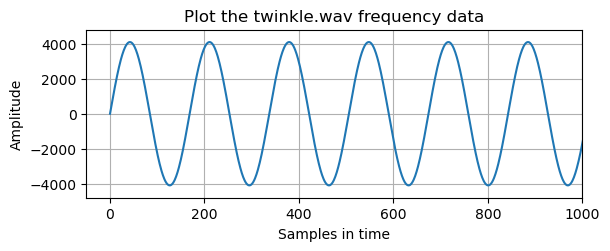

In [15]:
# Let's plot wavfile to see the frequency data

subplot(2,1,2)

plot(wave_data)

xlim([-50, 1000]); ylim([-4800,4800]) #limit it to the first few seconds only
title('Plot the twinkle.wav frequency data')
xlabel('Samples in time'); ylabel('Amplitude')

grid(True) #let's include the grid as well